<a href="https://colab.research.google.com/github/aliciawill/python-data/blob/master/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC(%ED%95%9C%EA%B8%80)_%EC%B9%B4%EC%B9%B4%EC%98%A4_pororo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 필요한 모듈

1. `konlpy`: 한글 형태소 분석기
  - [공식문서](https://konlpy.org/ko/latest/)
  - 한글 자연어처리를 위한 필수 설치 라이브러리

2. `pororo`: 카카오브레인에서 만든 한글 자연어처리 라이브러리
  - [Github 주소](https://github.com/kakaobrain/pororo)
  - [공식문서](https://kakaobrain.github.io/pororo/)

In [1]:
# konlpy 설치
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 467 kB/s 
     |████████████████████████████████| 453 kB 46.9 MB/s 


In [2]:
# Pororo 설치
!pip install git+https://github.com/kakaobrain/pororo.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/kakaobrain/pororo.git to /tmp/pip-req-build-u23icgbd
  Running command git clone -q https://github.com/kakaobrain/pororo.git /tmp/pip-req-build-u23icgbd
     |████████████████████████████████| 748.8 MB 18 kB/s 
     |████████████████████████████████| 5.9 MB 58.3 MB/s 
     |████████████████████████████████| 1.7 MB 60.7 MB/s 
     |████████████████████████████████| 4.2 MB 55.3 MB/s 
     |████████████████████████████████| 79 kB 9.9 MB/s 
     |████████████████████████████████| 1.5 MB 55.1 MB/s 
     |████████████████████████████████| 3.1 MB 53.5 MB/s 
     |████████████████████████████████| 468 kB 60.1 MB/s 
     |████████████████████████████████| 1.2 MB 59.1 MB/s 
     |████████████████████████████████| 42.4 MB 1.2 MB/s 
     |████████████████████████████████| 92 kB 12.4 MB/s 
     |████████████████████████████████| 151 kB 78.3 MB/s 
     |████████████████████

In [3]:
# mecab 형태소 분석기 설치
!pip install python-mecab-ko

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 213 kB 31.6 MB/s 
  ERROR: Failed building wheel for python-mecab-ko
  Running setup.py clean for python-mecab-ko
Failed to build python-mecab-ko
    Running setup.py install for python-mecab-ko ... done
  DEPRECATION: python-mecab-ko was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


In [4]:
# 예제 실행을 위한 사전 import
from pororo import Pororo

# 빈칸 채우기
fib = Pororo(task="fib", lang="ko")

# 이미지 캡셔닝
caption = Pororo(task="caption", lang="en")

# 자동 에세이 채점
aes = Pororo(task="aes", lang="en")

# 기계번역
mt = Pororo(task="translation", lang="multi")

# 한글 맞춤법(띄어쓰기) 수정
spacing = Pororo(task="gec", lang="ko")

# 영어 알파벳 수정
gec = Pororo(task="gec", lang="en")

# 요약
bullet_summ = Pororo(task="text_summarization", lang="ko", model="bullet")
ext_summ = Pororo(task="text_summarization", lang="ko", model="extractive")
abs_summ = Pororo(task="text_summarization", lang="ko", model="abstractive")

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading: "https://github.com/facebookresearch/detr/archive/master.zip" to /root/.cache/torch/hub/master.zip
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Downloading: "https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth" to /root/.cache/torch/hub/checkpoints/detr-r50-e632da11.pth


  0%|          | 0.00/159M [00:00<?, ?B/s]

As of now, this beta model tries to correct spacing errors in Korean text.


Downloading:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


Downloading:   0%|          | 0.00/337 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.00M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/110 [00:00<?, ?B/s]




You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


## 형태소 분석기 `konlpy` 예제

In [5]:
input_text = '''그룹 방탄소년단(BTS)이 두 번째 영어 곡 '버터'(Butter)로 미국 빌보드 메인 싱글 차트에서 2주 연속 정상에 올랐습니다.
빌보드는 지난달 21일 발매된 BTS의 '버터'가 메인 싱글 차트인 '핫 100'에서 지난주에 이어 1위를 기록했다고 7일(현지시간) 밝혔습니다.
'''
input_text

"그룹 방탄소년단(BTS)이 두 번째 영어 곡 '버터'(Butter)로 미국 빌보드 메인 싱글 차트에서 2주 연속 정상에 올랐습니다.\n빌보드는 지난달 21일 발매된 BTS의 '버터'가 메인 싱글 차트인 '핫 100'에서 지난주에 이어 1위를 기록했다고 7일(현지시간) 밝혔습니다.\n"

In [6]:
# 형태소 분석기 가져오기
from konlpy.tag import Okt

In [7]:
# 객체 생성
okt = Okt()

In [8]:
okt.pos(input_text)[:10]

[('그룹', 'Noun'),
 ('방탄소년단', 'Noun'),
 ('(', 'Punctuation'),
 ('BTS', 'Alpha'),
 (')', 'Punctuation'),
 ('이', 'Noun'),
 ('두', 'Noun'),
 ('번째', 'Suffix'),
 ('영어', 'Noun'),
 ('곡', 'Noun')]

In [9]:
okt.morphs(input_text)[:20]

['그룹',
 '방탄소년단',
 '(',
 'BTS',
 ')',
 '이',
 '두',
 '번째',
 '영어',
 '곡',
 "'",
 '버터',
 "'(",
 'Butter',
 ')',
 '로',
 '미국',
 '빌보드',
 '메인',
 '싱글']

## 문서 요약 (Text Summerization)

- [문서링크](https://kakaobrain.github.io/pororo/seq2seq/summary.html)

샘플 데이터 생성

In [10]:
input_text1 = """가수 김태연은 걸 그룹 소녀시대, 소녀시대-태티서 및 소녀시대-Oh!GG의 리더이자 메인보컬이다. 2004년 SM에서 주최한 청소년 베스트 선발 대회에서 노래짱 대상을 수상하며 SM 엔터테인먼트에 캐스팅되었다. 이후 3년간의 연습생을 거쳐 2007년 소녀시대의 멤버로 데뷔했다. 태연은 1989년 3월 9일 대한민국 전라북도 전주시 완산구에서 아버지 김종구, 어머니 김희자 사이의 1남 2녀 중 둘째로 태어났다. 가족으로는 오빠 김지웅, 여동생 김하연이 있다. 어릴 적부터 춤을 좋아했고 특히 명절 때는 친척들이 춤을 시키면 곧잘 추었다던 태연은 TV에서 보아를 보고 가수의 꿈을 갖게 되었다고 한다. 전주양지초등학교를 졸업하였고 전주양지중학교 2학년이던 2003년 SM아카데미 스타라이트 메인지방보컬과 4기에 들어가게 되면서 아버지와 함께 주말마다 전주에서 서울로 이동하며 가수의 꿈을 키웠다. 2004년에 당시 보컬 트레이너였던 더 원의 정규 2집 수록곡 〈You Bring Me Joy (Part 2)〉에 피처링으로 참여했다. 당시 만 15세였던 태연은 현재 활동하는 소속사 SM 엔터테인먼트에 들어가기 전이었다. 이후 태연은 2004년 8월에 열린 제8회 SM 청소년 베스트 선발 대회에서 노래짱 부문에 출전해 1위(대상)를 수상하였고 SM 엔터테인먼트에 정식 캐스팅되어 연습생 생활을 시작하게 되었다. 2005년 청담고등학교에 입학하였으나, 학교 측에서 연예계 활동을 용인하지 않아 전주예술고등학교 방송문화예술과로 전학하였고 2008년 졸업하면서 학교를 빛낸 공로로 공로상을 수상했다. 태연은 연습생 생활이 힘들어 숙소에서 몰래 뛰쳐나갔다가 하루 만에 다시 돌아오기도 했다고 이야기하기도 했다. 이후 SM엔터테인먼트에서 3년여의 연습생 기간을 거쳐 걸 그룹 소녀시대의 멤버로 정식 데뷔하게 되었다."""
input_text2 = """목성과 토성이 약 400년 만에 가장 가까이 만났습니다. 국립과천과학관 등 천문학계에 따르면 21일 저녁 목성과 토성은 1623년 이후 397년 만에 가장 가까워졌는데요. 크리스마스 즈음까지 남서쪽 하늘을 올려다보면 목성과 토성이 가까워지는 현상을 관측할 수 있습니다. 목성의 공전주기는 11.9년, 토성의 공전주기는 29.5년인데요. 공전주기의 차이로 두 행성은 약 19.9년에 한 번 가까워집니다. 이번 근접 때  목성과 토성 사이 거리는 보름달 지름의 5분의 1 정도로 가까워졌습니다. 맨눈으로 보면 두 행성이 겹쳐져 하나의 별처럼 보이는데요. 지난 21일 이후 목성과 토성의 대근접은 2080년 3월 15일로 예측됩니다. 과천과학관 측은 우리가 대근접을 볼 수 있는 기회는 이번이 처음이자 마지막이 될 가능성이 크다라고 설명했 습니다."""

In [11]:
input_text1

'가수 김태연은 걸 그룹 소녀시대, 소녀시대-태티서 및 소녀시대-Oh!GG의 리더이자 메인보컬이다. 2004년 SM에서 주최한 청소년 베스트 선발 대회에서 노래짱 대상을 수상하며 SM 엔터테인먼트에 캐스팅되었다. 이후 3년간의 연습생을 거쳐 2007년 소녀시대의 멤버로 데뷔했다. 태연은 1989년 3월 9일 대한민국 전라북도 전주시 완산구에서 아버지 김종구, 어머니 김희자 사이의 1남 2녀 중 둘째로 태어났다. 가족으로는 오빠 김지웅, 여동생 김하연이 있다. 어릴 적부터 춤을 좋아했고 특히 명절 때는 친척들이 춤을 시키면 곧잘 추었다던 태연은 TV에서 보아를 보고 가수의 꿈을 갖게 되었다고 한다. 전주양지초등학교를 졸업하였고 전주양지중학교 2학년이던 2003년 SM아카데미 스타라이트 메인지방보컬과 4기에 들어가게 되면서 아버지와 함께 주말마다 전주에서 서울로 이동하며 가수의 꿈을 키웠다. 2004년에 당시 보컬 트레이너였던 더 원의 정규 2집 수록곡 〈You Bring Me Joy (Part 2)〉에 피처링으로 참여했다. 당시 만 15세였던 태연은 현재 활동하는 소속사 SM 엔터테인먼트에 들어가기 전이었다. 이후 태연은 2004년 8월에 열린 제8회 SM 청소년 베스트 선발 대회에서 노래짱 부문에 출전해 1위(대상)를 수상하였고 SM 엔터테인먼트에 정식 캐스팅되어 연습생 생활을 시작하게 되었다. 2005년 청담고등학교에 입학하였으나, 학교 측에서 연예계 활동을 용인하지 않아 전주예술고등학교 방송문화예술과로 전학하였고 2008년 졸업하면서 학교를 빛낸 공로로 공로상을 수상했다. 태연은 연습생 생활이 힘들어 숙소에서 몰래 뛰쳐나갔다가 하루 만에 다시 돌아오기도 했다고 이야기하기도 했다. 이후 SM엔터테인먼트에서 3년여의 연습생 기간을 거쳐 걸 그룹 소녀시대의 멤버로 정식 데뷔하게 되었다.'

In [12]:
# supports various decoding strategies 
abs_summ(
    input_text1, 
    beam=5, 
    len_penalty=0.6,
    no_repeat_ngram_size=3,
    top_k=50,
    top_p=0.7
)

'가수 김태연은 2004년 SM 청소년 베스트 선발 대회에서 노래짱 대상을 수상하여 SM 엔터테인먼트에 캐스팅되어 3년간의 연습생 생활을 거쳐 2007년 소녀시대의 멤버로 데뷔했다.'

In [ ]:
input_text2

'목성과 토성이 약 400년 만에 가장 가까이 만났습니다. 국립과천과학관 등 천문학계에 따르면 21일 저녁 목성과 토성은 1623년 이후 397년 만에 가장 가까워졌는데요. 크리스마스 즈음까지 남서쪽 하늘을 올려다보면 목성과 토성이 가까워지는 현상을 관측할 수 있습니다. 목성의 공전주기는 11.9년, 토성의 공전주기는 29.5년인데요. 공전주기의 차이로 두 행성은 약 19.9년에 한 번 가까워집니다. 이번 근접 때  목성과 토성 사이 거리는 보름달 지름의 5분의 1 정도로 가까워졌습니다. 맨눈으로 보면 두 행성이 겹쳐져 하나의 별처럼 보이는데요. 지난 21일 이후 목성과 토성의 대근접은 2080년 3월 15일로 예측됩니다. 과천과학관 측은 우리가 대근접을 볼 수 있는 기회는 이번이 처음이자 마지막이 될 가능성이 크다라고 설명했 습니다.'

In [13]:
# supports various decoding strategies 
abs_summ(
    input_text2, 
    beam=5, 
    len_penalty=0.6,
    no_repeat_ngram_size=3,
    top_k=50,
    top_p=0.7
)

'천과과천과학관 등 천문학계에 따르면 21일 저녁 목성과 토성은 1623년 이후 397년 만에 약 400년 만에 가장 가까워졌으며 2080년 3월 15일은 될 것으로 예측된다.'

### 3개의 주요 문장 추출

In [14]:
output_text1 = ext_summ(input_text1)
for line in output_text1.split('.'):
    print(line)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[Korean Sentence Splitter]: Initializing Pynori...


2004년 SM에서 주최한 청소년 베스트 선발 대회에서 노래짱 대상을 수상하며 SM 엔터테인먼트에 캐스팅되었다
 이후 태연은 2004년 8월에 열린 제8회 SM 청소년 베스트 선발 대회에서 노래짱 부문에 출전해 1위(대상)를 수상하였고 SM 엔터테인먼트에 정식 캐스팅되어 연습생 생활을 시작하게 되었다
 이후 SM엔터테인먼트에서 3년여의 연습생 기간을 거쳐 걸 그룹 소녀시대의 멤버로 정식 데뷔하게 되었다



In [15]:
output_text2 = ext_summ(input_text2)
for line in output_text2.split('.'):
    print(line)

국립과천과학관 등 천문학계에 따르면 21일 저녁 목성과 토성은 1623년 이후 397년 만에 가장 가까워졌는데요
 크리스마스 즈음까지 남서쪽 하늘을 올려다보면 목성과 토성이 가까워지는 현상을 관측할 수 있습니다
 지난 21일 이후 목성과 토성의 대근접은 2080년 3월 15일로 예측됩니다



### Bullet 포인트

In [16]:
# supports various decoding strategies 
bullet_summ(
    input_text1, 
    beam=5, 
    len_penalty=0.6,
    no_repeat_ngram_size=3,
    top_k=50,
    top_p=0.7
)

['태연, 청소년 베스트 선발 대회에서 노래짱 대상 수상', ' 태연, SM 엔터테인먼트에 캐스팅']

### 신문기사 요약

In [19]:
# 신문기사의 URL
url = 'https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=101&oid=009&aid=0004886133'

뉴스 기사 내용 받아오기

In [25]:
from bs4 import BeautifulSoup
import requests

headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"}
req = requests.get(url, headers=headers)
soup = BeautifulSoup(req.text, 'html.parser')
body = soup.find_all(id='newsct_article')
# body[0].text
body[0].text

'\n\n\t\t\t◆ 삼성 인사제도 혁신 ◆삼성전자가 \'이재용의 뉴 삼성\'을 뒷받침하는 인사 혁신을 단행했다. 직급별 표준 체류기간과 승격 포인트를 폐지해 과감한 발탁 승진이 가능하도록 한 것이 특징이다. 삼성전자는 29일 연공서열을 타파하 는 인사 제도 혁신안을 마련하고 내년부터 시행한다고 밝혔다. 젊은 경영진을 조기에 육성하는 삼성형 패스트트랙이 시행되면 30대 임원, 40대 최고경영자(CEO)가 탄생할 것으로 예상된다.직급표기 삭제·승진연한 폐지…삼성, 실리콘밸리식 조직 탈바꿈이재용의 \'뉴삼성\' 인사혁신직급 대신 전문성으로만 평가능력 있으면 빠르게 발탁 승진전무 없애고 부사장으로 통합제조업식 연공서열 문화 없애유연·수평적인 기업문화 구축다른부서 이동 \'사내FA\'로다양한 직무경험 기회 제공 \n\n\n\n 이재용 삼성전자 부회장이 \'뉴 삼성\'을 선언한 뒤 처음으로 단행된 이번 삼성전자 인사제도 개편은 연공서열을 없애고 수평적이고 유연한 기업문화를 조성하는 것이 핵심이다. 삼성전자가 제조업에 총력을 기울이던 시기에 만들어진 기업문화를 세계적인 정보통신기술(ICT) 기업에 맞게 새롭게 개편하는 것이다. 이번 인사제도 혁신안에서 눈에 띄는 것은 삼성형 패스트트랙이다. 부사장·전무 직급을 부사장으로 통합해 임원 직급 단계를 축소하고 직급별 표준 체류기간이나 근무 연한을 없앤 것이 핵심이다. 여기에는 나이와 상관없이 젊고 유능한 인재를 발탁하고 능력 있는 경영자를 조기에 배출하겠다는 의지가 담겨 있다. 지난 9월 말 기준 삼성전자 임원은 모두 1080명이다. 이 가운데 부사장은 67명, 전무는 129명이다. 부사장·전무 직급을 통합하면 삼성전자에는 200여 명에 가까운 차기 최고경영자(CEO) 후보군이 생기게 된다.이경묵 서울대 경영대학원 교수는 "전무나 부사장 등 특정 직급과 연봉에 국한하지 않고 파격적으로 외부 인사를 스카우트할 수 있는 기반을 마련한 것"이라며 "인재 영입 전쟁에서 유리한 고지를 선점할 수 있게 됐다"고 말했다.특히 직급별 근무

In [26]:
abs_summ(
    body[0].text, 
    beam=5, 
    len_penalty=0.6,
    no_repeat_ngram_size=3,
    top_k=50,
    top_p=0.7
)

"삼성전자는 삼성전자는 '뉴 삼성'을 선언한 뒤 연공서열을 없애고 수평적이고 유연한 기업문화를 조성하는 인사제도 혁신안을 마련해 내년부터 시행한다고 밝혀 30대 임원, 40대 최고경영자(CEO) 탄생이 기대된다."

In [29]:
def summerize_news(url):
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"}
    req = requests.get(url, headers=headers)
    soup = BeautifulSoup(req.text, 'html.parser')
    body = soup.find_all(id='newsct_article')
    if len(body) > 0:
        text = body[0].text
        output_bullet = bullet_summ(text, 
                                    beam=5, 
                                    len_penalty=0.6,
                                    no_repeat_ngram_size=3,
                                    top_k=50,
                                    top_p=0.7)
        summary_output = abs_summ(text, 
                                  beam=5, 
                                  len_penalty=0.6,
                                  no_repeat_ngram_size=3,
                                  top_k=50,
                                  top_p=0.7
                                  )
        print('[주요]')
        for line in output_bullet:
            print(f'- {line}')
        print('[요약]')
        print(summary_output)
    else:
        return "에러ㅜ"

In [30]:
summerize_news('https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=101&oid=009&aid=0004886133')

[주요]
- 연공서열 없애고 유연한 기업문화 조성
-  30대 임원·40대 최고경영자 탄생 전망
[요약]
삼성전자는 삼성전자는 이번 인사제도 개편에서 부사장·전무 직급을 부사장으로 통합해 임원 직급의 표준 체류기간이나 근무 연한을 없애 젊고 유능한 인재를 발탁하고 능력 있는 경영자를 조기에 배출하겠다는 의지를 보였다.


## 맞춤법 수정 (Grammar Correction)

### 문법 오류 수정

In [31]:
# 오류 문장 입력
gec("This apple are so sweet.")

'This apple is so sweet.'

### 한글 띄어쓰기 오류 수정

In [32]:
# 오류 문장 입력
spacing("아버지가방에들어간다.")

'아버지가 방에 들어간다.'

## 기계번역 Machine Translation

In [33]:
# mt = Pororo(task="translation", lang="multi")
mt("케빈은 아직도 일을 하고 있다.", src="ko", tgt="en")

'Kevin is still working.'

## 자동 에세이 채점 Automated Essay Scoring

In [34]:
# aes = Pororo(task="aes", lang="en")
aes('''
The lecturer talks about research conducted by a firm that used the group system to handle their work. He says that the theory stated in the passage was very different and somewhat inaccurate when compared to what happened for real.
First, some members got free rides. That is, some didn’t work hard but gotrecognition for the success nontheless. This also indicates that people who worked hard was not given recognition they should have got. In other words, they weren’t given the oppotunity to “shine”. This derectly contradicts what the passage indicates.
Second, groups were slow in progress. The passage says that groups are nore responsive than individuals because of the number of people involved and their aggregated resources. However, the speaker talks about how the firm found out that groups were slower than individuals in dicision making. Groups needed more time for meetings, which are neccesary procceedures in decision making. This was another part where experience contradicted theory.
Third, influetial people might emerge, and lead the group towards glory or failure. If the influent people are going in the right direction there would be no problem. But in cases where they go in the wrong direction, there is nobody that has enough influence to counter the decision made. In other words, the group might turn into a dictatorship, with the influential party as the leader, and might be less flexible in thinking. They might become one-sided, and thus fail to succeed.
''')

64.47

In [35]:
aes('''
Throw out the bottles and boxes of drugs in your house. A new theory suggests that medicine could be bad for your health, which should at least come as good news to people who cannot afford to buy expensive medicine. However, it is a blow to the medicine industry, and an even bigger blow to our confidence in the progress of science. This new theory argues that healing is at our fingertips: we can be healthy by doing Reiki on on a regular basis.
''')

35.21

In [36]:
aes('''
Online games aren't just a diversion, but a unique way to meet other people. As millions of gamers demonstrate, playing online is about friendship and cooperation, not just killing monsters. These games are a viable social network because players focus on teamwork, form groups with like-minded people and have romantic relationships with other players. Massively Multiplayer Online Games (MMOGs) feature millions of players interacting in the same environment. The games are social in nature as they allow players to band together and complete missions based on a story line, or test their skills by fighting against each other. At the start of the game, the user creates a fictional character, and customizes its physical appearance. Since many games involve combat, players also outfit their characters with armor and weapons, as well as choose their "profession." Many popular game titles like World of Warcraft and Everquest follow a fantasy theme, so most professions have magical abilities like healing other players or raising undead minions. While the process seems simple, players may spend hours agonizing over the perfect look for their character, from their armor color to the type of skills to use in battle. Once their character is created, the player is free to explore the vast, digital world and interact with other players; however they must pay on average $15 a month for game content. MMOG users are mostly male - usually between the ages of 18-34 - although titles like World of Warcraft have a healthy population of female players as well. With millions of players, there are plenty of people to adventure with.
''')

67.14

## Fill in the blank

In [37]:
fib("손흥민은 __의 축구선수이다.")

['대한민국',
 '잉글랜드',
 '독일',
 '스웨덴',
 '네덜란드',
 '덴마크',
 '미국',
 '웨일스',
 '노르웨이',
 '벨기에',
 '프랑스',
 '국적',
 '일본',
 '한국']

In [38]:
fib("대한민국의 수도는 __이다.")

['서울', '대한민국', '시', '광역시', '리', '베이징', '직할시', '평양직할시', '1', '부산']

## 이미지 캡션 (Image Captioning)

In [39]:
from IPython.display import Image

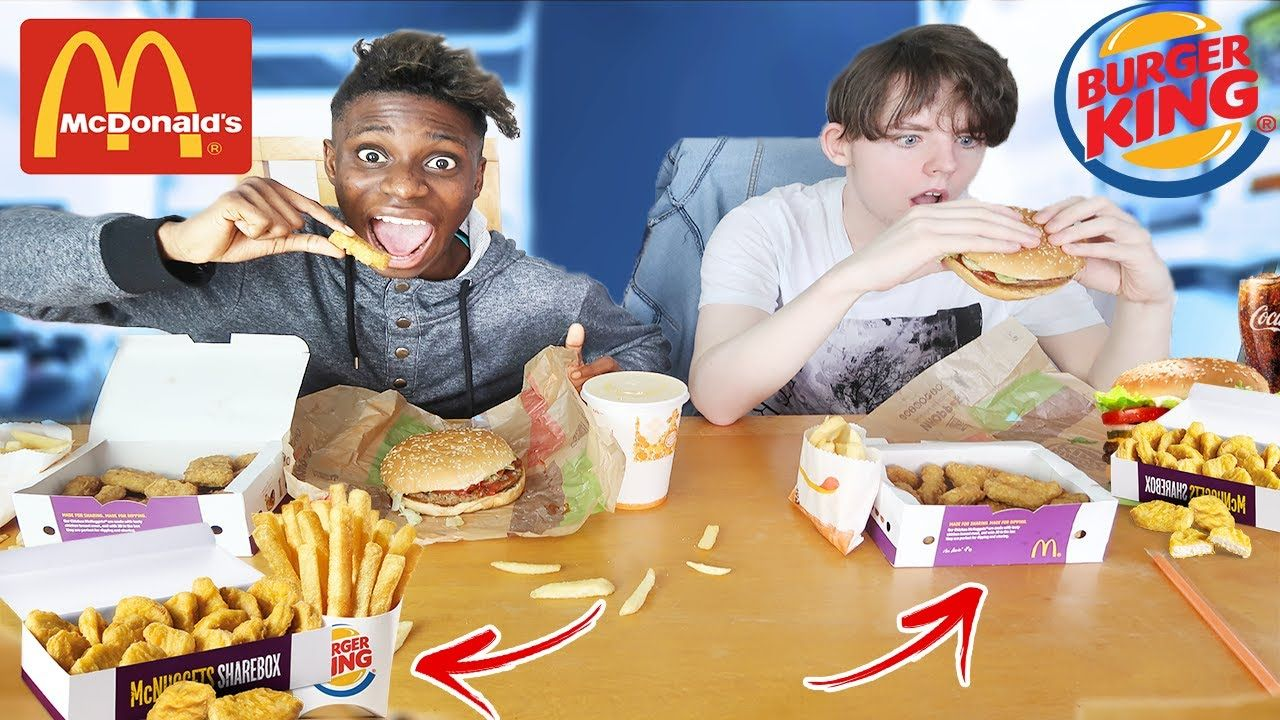

In [40]:
url = 'https://i.pinimg.com/originals/b9/de/80/b9de803706fb2f7365e06e688b7cc470.jpg'
Image(url, width=750)

In [41]:
caption(url)

'Two men sitting at a table with plates of food.'

## 참고 Reference

- [https://github.com/kakaobrain/pororo](https://github.com/kakaobrain/pororo)
- [https://kakaobrain.github.io/pororo/](https://kakaobrain.github.io/pororo/)